In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# When an A/B test is not best

A/B testing is not a one-size-fits-all. It is important to understand when to utilize the power of A/B testing to create value for your organization, but it's equally crucial to realize when it would be a complete waste of resources and time to do so.

Using what you've learned about the good A/B testing use-cases, which of the following scenarios is not a good fit for A/B testing?

### Possible Answers


    Testing a new dating app matching algorithm after consulting with experts regarding the ethical and emotional implications to the participants.
    
    
    Testing two different landing pages for a newly built website with intermittent and unpredictable traffic. {Answer}
    
    
    Testing a different copy of an ad based on a researched hypothesis that the team came up with.
    
    
    Experimenting with a different design of a checkout page with clearer call-to-action.

**Conclusion**

New websites usually have limited traffic which reduces our chances of reaching conclusive results.

# A/B testing steps

Imagine you are a Data Analyst at a marketing company and have been tasked with setting up an A/B test to evaluate the effectiveness of three different copies of an ad.

Using what you have learned about the high-level steps of A/B testing, which order makes most logical sense if you were to perform the test yourself?

### Sort the following steps in logical order.

![Answer](/home/nero/Documents/Estudos/DataCamp/Python/courses/ab-testing-in-python/ab_test-01.png)

In [14]:
import pandas as pd
checkout = pd.read_csv(path_data+'checkout.csv', index_col=0)
checkout.head()

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696


In [16]:
# exercise 01

"""
Randomization effects

Random assignment plays a critical role in A/B testing. Imagine you are a Data Scientist setting up an experiment to test the effects of different checkout page designs on business metrics.

You will explore sampling a percentage of users to simulate random enrollment of traffic into the experiment and check the distributions of certain attributes across randomly assigned users in each group. This allows you to verify the ability to generalize to the general traffic population, and isolate the impact of the one variable we are changing across groups: the check out page design.

checkout DataFrame is loaded for you. Assume every row in the DataFrame corresponds to a unique user visiting the respective checkout_page along with their actions and additional attributes.
"""

# Instructions

"""

    Use the pandas .value_counts() method to determine the normalized distribution of browser counts in the dataset.
---

    Take a random sample of 2,000 data points and assign it to the sample_df variable, then check the distribution of browser types in the sampled DataFrame.
---

    Use pandas .value_counts() method to check the counts of browser types in the sampled DataFrame.
---

    Use the pandas .groupby() method to check the counts of browser types per checkout_page.

"""

# solution

# Determine the normalized distribution of browser counts
checkout['browser'].value_counts(normalize = True)

# Draw a random sample of rows
sample_df = checkout.sample(n = 2000)

# Check the counts distribution of sampled users' browsers
sample_df['browser'].value_counts(normalize = True)

# Check the counts distribution of browsers across checkout pages
print(checkout.groupby('checkout_page')['browser'].value_counts(normalize = True))

#----------------------------------#

# Conclusion

"""
Great work! Looks like an even ~33% throughout the groups! Notice how randomization not only allows us to generalize results to the population, but also isolate the effect of the different designs by ensuring similar distribution of all known and hidden variables between the groups.
"""

checkout_page  browser
A              chrome     0.341333
               safari     0.332000
               firefox    0.326667
B              safari     0.352000
               firefox    0.325000
               chrome     0.323000
C              safari     0.346000
               chrome     0.330000
               firefox    0.324000
Name: proportion, dtype: float64


'\nGreat work! Looks like an even ~33% throughout the groups! Notice how randomization not only allows us to generalize results to the population, but also isolate the effect of the different designs by ensuring similar distribution of all known and hidden variables between the groups.\n'

In [17]:
admissions = pd.read_csv(path_data+'admissions.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


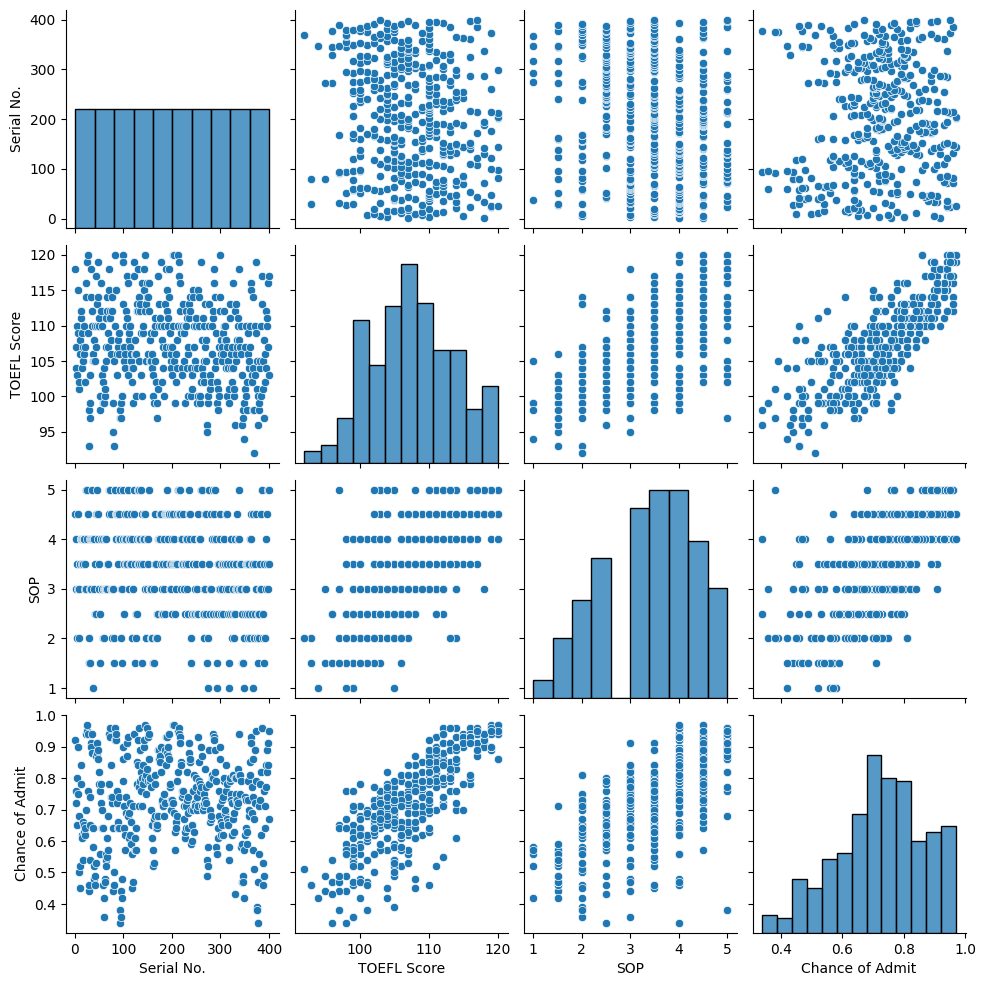

                 Serial No.  TOEFL Score       SOP  Chance of Admit
Serial No.         1.000000    -0.147932 -0.166932         0.042336
TOEFL Score       -0.147932     1.000000  0.657981         0.791594
SOP               -0.166932     0.657981  1.000000         0.675732
Chance of Admit    0.042336     0.791594  0.675732         1.000000


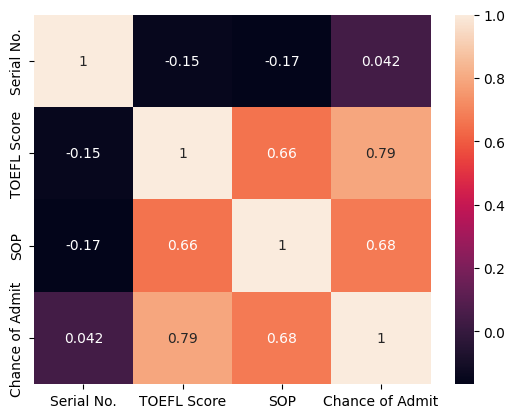

'\nGreat job! Correlations enable us to analyze both the strength and direction of the relationship between two sets of variables.\n'

In [19]:
# exercise 02

"""
Correlation visualization

Though correlations do not imply causation, they quantify the strength and direction to which two variables are associated. This is especially useful in situations where A/B tests are not feasible due to lack of resources or limited data/user-base.

The admissions dataset is loaded for you and includes various information like GRE score, TOEFL score, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, and chance of admission. You will examine the relationship between some of these attributes and how the chances of admission changes with changes in these variables.
"""

# Instructions

"""

    Import the Seaborn library and give it the alias sns.
    Inspect the relationship of the Serial No., TOEFL Score, SOP, Chance of Admit variables visually, in that order, using a grid of scatter plots.
---
    Examine the relationship's strength and direction using Pearson's correlation coefficients between the Serial No., TOEFL Score, SOP, Chance of Admit variables, in that order.
---
    Visualize Pearson's correlation coefficients in a heat map with annotated coefficients.

"""

# solution

# Import seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the variables in a pairplot
sns.pairplot(admissions[['Serial No.', 'TOEFL Score', 'SOP', 'Chance of Admit']])
plt.show()

#----------------------------------#

# Print Pearson's correlation coefficients
print(admissions[['Serial No.', 'TOEFL Score', 'SOP', 'Chance of Admit']].corr())

#----------------------------------#

# Visualize the coefficients in a heatmap
sns.heatmap(admissions[['Serial No.', 'TOEFL Score', 'SOP','Chance of Admit']].corr(), annot = True)
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Correlations enable us to analyze both the strength and direction of the relationship between two sets of variables.
"""

In [22]:
# exercise 03

"""
Correlation or causation?

A good Data Scientist is able to identify the limitations of a study and distinguish between a mere correlation versus a causal relationship that A/B tests enable us to claim. The gen_habits DataFrame is loaded for you and has the columns monthly_orders and monthly_hours. The fictitious data is observational in nature (i.e. not part of a controlled experiment). Which of the following statements best describes the relationship between the two variables?
"""

# Instructions

"""
There is a weak relationship between the variables, and nothing can be inferred about causality
"""

# solution

gen_habits = pd.read_csv(path_data+'gen_habits.csv')
print(gen_habits.corr(numeric_only=True))

#----------------------------------#

# Conclusion

"""
That's correct! We cannot claim any causal relationships as this data is observational and not part of a controlled experiment.
"""

                monthly_orders  monthly_hours
monthly_orders        1.000000      -0.343663
monthly_hours        -0.343663       1.000000


"\nThat's correct! We cannot claim any causal relationships as this data is observational and not part of a controlled experiment.\n"

In [24]:
# exercise 04

"""
Means and proportions

Mean and proportion estimates usually serve as great primary metrics when aligned with the business goals.

The checkout DataFrame is loaded for you, where every row corresponds to a unique user visiting the respective checkout_page along with their actions and additional attributes. A '1' value in the purchased column corresponds to a user purchasing an item, and a '0' means they have abandoned the page without purchasing. You will examine the data and calculate both mean and proportions as an exploratory step towards evaluating which design performs best.
"""

# Instructions

"""

    Calculate the mean order_value for each of the checkout pages.
---
    Calculate the proportion of users who purchased an item for each checkout_page.
---
    Calculate the proportion of users who purchased an item for each checkout_page and the mean order_value.

"""

# solution

# Calculate the mean order value for each group
checkout.groupby('checkout_page')['order_value'].mean()

#----------------------------------#

# Calculate the proportion of users who purchased for each page
checkout.groupby('checkout_page')['purchased'].mean()

#----------------------------------#

# Calculate the proportion of users who purchased and the mean order value
print(checkout.groupby('checkout_page')[['purchased', 'order_value']].mean())
#----------------------------------#

# Conclusion

"""
Great job! Looks like checkout page 'C' has the highest average order value and percentage of users purchasing. But is this enough information to suggest that checkout page 'C' wins?
"""

               purchased  order_value
checkout_page                        
A               0.820333    24.956437
B               0.847000    29.876202
C               0.867667    34.917589


"\nGreat job! Looks like checkout page 'C' has the highest average order value and percentage of users purchasing. But is this enough information to suggest that checkout page 'C' wins?\n"

In [25]:
AdSmart = pd.read_csv(path_data+'AdSmart.csv')
AdSmart.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [26]:
# exercise 05

"""
Ad impressions metrics

An advertising company has developed a new ad to increase users' engagement with their questionnaire. The new ad was shown to a percentage of users in the exposed group and a dummy ad was shown to the control. Consider yourself the Data Analyst responsible for interpreting the results of the test. The first step you decide to take is to define and estimate useful metrics to begin evaluating the success of the marketing initiative.

Use what you've learned in the video to design success metrics and analyze the differences between the two experiment types in the experiment column. The AdSmart Kaggle dataset is loaded for you.
(https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing/data)
"""

# Instructions

"""

    Use DataFrame filtering to only include the rows where users responded to the ad with a 'yes' or a 'no', and store the result in a new variable AdSmart_Responded.
---

    Explore AdSmart_Responded and find the breakdown of counts per experiment of those who responded with yes after the date '2020-07-05'?
---

    Calculate the proportion of users who responded yes for each experiment type separately.
---

    Calculate the proportion of users who responded yes by experiment type and platform OS.

"""

# solution

# Filter on users who responded 
AdSmart_Responded = AdSmart[(AdSmart['yes'] == 1) | (AdSmart['no'] == 1)]

# Find the counts of yes after 2020-07-05 per experiment
AdSmart_Responded[(AdSmart_Responded['date'] > '2020-07-05')].groupby('experiment').count()

# Proportion of users who responded 'yes' by experiment type
AdSmart_Responded.groupby('experiment')['yes'].mean()

# Proportion of users who responded 'yes' by experiment type and platform OS
print(AdSmart_Responded.groupby(['experiment','platform_os'])['yes'].mean())

#----------------------------------#

# Conclusion

"""
Great work! You can see that the proportion of users who responded with yes not only differs by experiment group, but also by paltform OS. Those differences may or may not be significant and will influence the decision of proceeding with the new ad initiative.
"""

experiment  platform_os
control     5              0.307692
            6              0.453752
exposed     5              0.250000
            6              0.470138
Name: yes, dtype: float64


'\nGreat work! You can see that the proportion of users who responded with yes not only differs by experiment group, but also by paltform OS. Those differences may or may not be significant and will influence the decision of proceeding with the new ad initiative.\n'